# Phase - 4

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('csv_files_sql/01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [7]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [15]:
agg_data = df.groupby(['STATE/UT', 'DISTRICT']).sum().reset_index()
cluster_data = agg_data.drop(['STATE/UT', 'DISTRICT', 'YEAR'], axis=1)
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(cluster_data_scaled)
agg_data['Cluster'] = clusters

print(agg_data[['STATE/UT', 'DISTRICT', 'Cluster']])

          STATE/UT         DISTRICT  Cluster
0    A & N ISLANDS  A and N ISLANDS        1
1    A & N ISLANDS          ANDAMAN        1
2    A & N ISLANDS              CAR        1
3    A & N ISLANDS          NICOBAR        1
4    A & N ISLANDS            NORTH        1
..             ...              ...      ...
857    WEST BENGAL   SEALDAH G.R.P.        1
858    WEST BENGAL  SILIGURI G.R.P.        1
859    WEST BENGAL      SILIGURI_PC        1
860    WEST BENGAL            TOTAL        2
861    WEST BENGAL   UTTAR DINAJPUR        1

[862 rows x 3 columns]


In [19]:
new_df = agg_data[['STATE/UT', 'DISTRICT', 'Cluster']]

In [20]:
new_df

,STATE/UT,DISTRICT,Cluster
0,A & N ISLANDS,A and N ISLANDS,1
1,A & N ISLANDS,ANDAMAN,1
2,A & N ISLANDS,CAR,1
3,A & N ISLANDS,NICOBAR,1
4,A & N ISLANDS,NORTH,1
...,...,...,...
857,WEST BENGAL,SEALDAH G.R.P.,1
858,WEST BENGAL,SILIGURI G.R.P.,1
859,WEST BENGAL,SILIGURI_PC,1
860,WEST BENGAL,TOTAL,2


In [34]:
state_list_1 = []
district_list_1 = []
cluster_list_1 = []

state_list_2 = []
district_list_2 = []
cluster_list_2 = []

state_list_3 = []
district_list_3 = []
cluster_list_3 = []

In [38]:
for row in new_df.iterrows():
#     print(row[1]['Cluster'])
    if(row[1]['Cluster'] == 1):
        state_list_1.append(row[1]['STATE/UT'])
        district_list_1.append(row[1]['DISTRICT'])
        cluster_list_1.append(row[1]['Cluster'])
    elif (row[1]['Cluster'] == 2):
        state_list_2.append(row[1]['STATE/UT'])
        district_list_2.append(row[1]['DISTRICT'])
        cluster_list_2.append(row[1]['Cluster'])
    elif (row[1]['Cluster'] == 3):
        state_list_3.append(row[1]['STATE/UT'])
        district_list_3.append(row[1]['DISTRICT'])
        cluster_list_3.append(row[1]['Cluster'])

In [40]:
cluster_one = {
    "state_ut":state_list_1,
    "district":district_list_1,
    "cluster":cluster_list_1
}

df_one = pd.DataFrame(cluster_one)
df_one

,state_ut,district,cluster
0,A & N ISLANDS,A and N ISLANDS,1
1,A & N ISLANDS,ANDAMAN,1
2,A & N ISLANDS,CAR,1
3,A & N ISLANDS,NICOBAR,1
4,A & N ISLANDS,NORTH,1
...,...,...,...
838,WEST BENGAL,PURULIA,1
839,WEST BENGAL,SEALDAH G.R.P.,1
840,WEST BENGAL,SILIGURI G.R.P.,1
841,WEST BENGAL,SILIGURI_PC,1


In [41]:
cluster_two = {
    "state_ut":state_list_2,
    "district":district_list_2,
    "cluster":cluster_list_2
}

df_two = pd.DataFrame(cluster_two)
df_two

,state_ut,district,cluster
0,ASSAM,TOTAL,2
1,CHHATTISGARH,TOTAL,2
2,DELHI UT,DELHI UT TOTAL,2
3,GUJARAT,TOTAL,2
4,HARYANA,TOTAL,2
5,JHARKHAND,TOTAL,2
6,KARNATAKA,BANGALORE COMMR.,2
7,KARNATAKA,TOTAL,2
8,KERALA,TOTAL,2
9,ODISHA,TOTAL,2


In [42]:
cluster_three = {
    "state_ut":state_list_3,
    "district":district_list_3,
    "cluster":cluster_list_3
}

df_three = pd.DataFrame(cluster_three)
df_three

,state_ut,district,cluster


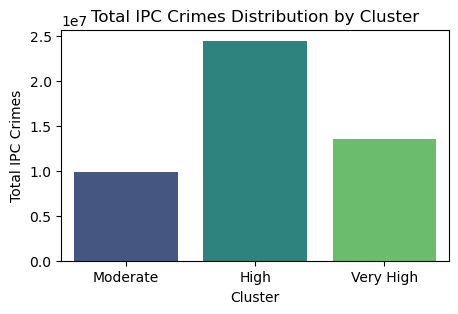

In [54]:
plt.figure(figsize=(5, 3), facecolor='white')

total_crimes_by_cluster = agg_data.groupby('Cluster')['TOTAL IPC CRIMES'].sum()
sns.barplot(x=total_crimes_by_cluster.index, y=total_crimes_by_cluster.values, palette='viridis')

plt.title('Total IPC Crimes Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total IPC Crimes')
plt.xticks([0, 1, 2], ['Moderate', 'High', 'Very High'])
plt.grid(False)
plt.show()

sensitive_areas = agg_data[agg_data['Cluster'] == 2]
top_factors = sensitive_areas.drop(['STATE/UT', 'DISTRICT', 'YEAR', 'Cluster'], axis=1).sum().sort_values(ascending=False).head(5)
# print(top_factors)